In [4]:
import os
import zipfile
import pandas as pd
from PIL import Image
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Preprocessing and visualisation

In [5]:
from google.colab import drive
drive.mount('/content/drive')

# Set the path to the zip file
zip_path = "/content/drive/MyDrive/archive.zip"

# Extract the images from the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


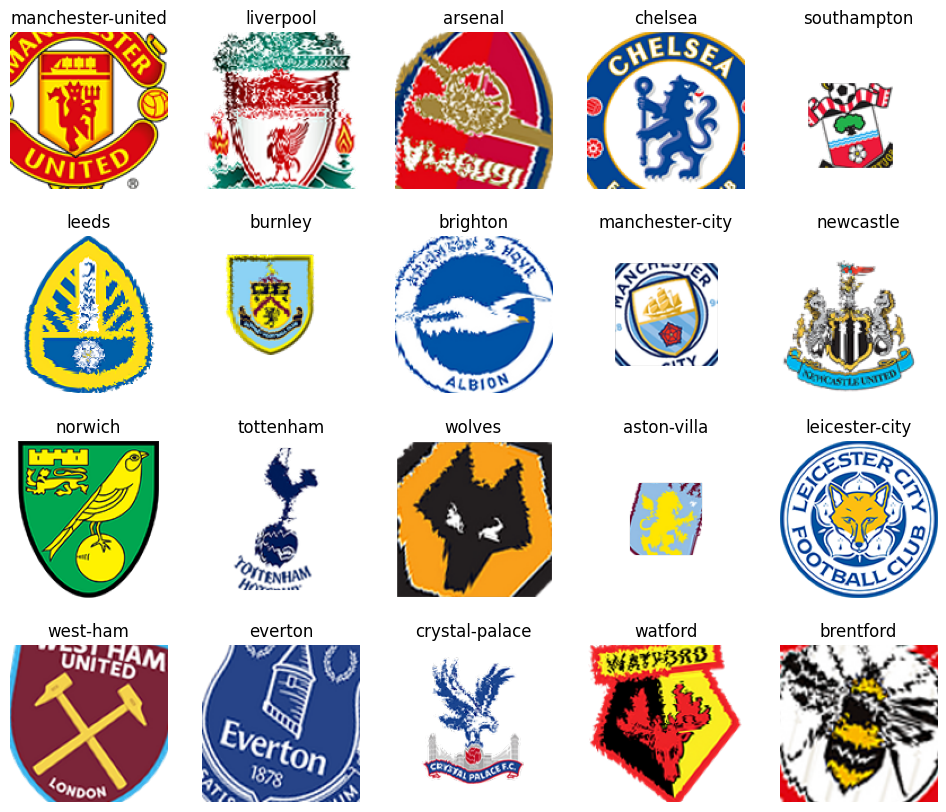

In [ ]:
# Plotting an image from each class

# Load the train dataset from the extracted zip file
df = pd.read_csv('/content/train.csv')

# Changing the file paths in the training datset to required path formats
old_str = '../input/english-premier-league-logo-detection-20k-images/epl-logos-big'
new_str = '/content/epl-logos-big'
replace_func = lambda x: x.replace(old_str, new_str)
df['filepath'] = df['filepath'].apply(replace_func)

class_labels = df['team'].unique()
images=[]
teamname=[]

# Displaying an image from each class
for label in class_labels:
    # filename of an image from the current class
    filepath = df[df['team'] == label]['filepath'].iloc[0]
    images.append(filepath)
    name = df[df['team'] == label]['team_name'].iloc[0]
    teamname.append(name)

num_rows = 4
num_cols = 5

fig = plt.figure(figsize=(12, 10))

# Looping through each image and its label, and plotting it in a subplot
for i in range(num_rows):
    for j in range(num_cols):
        # index of the current image
        index = i * num_cols + j

        # extracting the current image and its label
        label = teamname[index]
        img = Image.open(images[index])
        # Plot the image and label
        ax = fig.add_subplot(num_rows, num_cols, index+1)
        ax.imshow(img)
        ax.set_title(label)
        ax.axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.3, wspace=0.2)
plt.show()



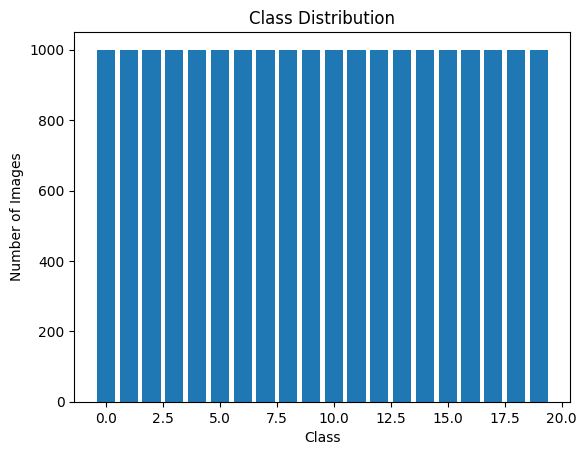

In [ ]:
# Visualising the class distribution
class_count = df['team'].value_counts()

# Create a bar graph
plt.bar(class_count.index, class_count.values)

# Add labels and title
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Class Distribution")

plt.show()

# SVM on the greyscale images

In [ ]:
import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Loading images and converting them to grayscale
X = []
for filepath in df['filepath']:
    img = cv2.imread(filepath)
    img = cv2.resize(img, (100, 100))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    X.append(gray.flatten())

y = np.array(df['team'])

# train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM model
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.958


In [ ]:
print("The classification report for svm is:")
print(classification_report(y_test,y_pred))

The classification report for svm is:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       226
           1       0.97      1.00      0.98       209
           2       0.93      0.95      0.94       188
           3       0.98      0.96      0.97       202
           4       0.93      0.95      0.94       211
           5       0.96      0.98      0.97       203
           6       0.98      0.95      0.97       200
           7       0.94      0.96      0.95       202
           8       0.97      0.97      0.97       199
           9       0.97      0.98      0.98       194
          10       0.98      0.95      0.97       179
          11       0.98      0.98      0.98       208
          12       0.95      0.90      0.92       173
          13       0.98      0.98      0.98       204
          14       0.90      0.93      0.92       194
          15       0.96      0.92      0.94       214
          16       0.99      0.99      0.99

# SVM

In [ ]:
# Load the images
X = []
for filepath in df['filepath']:
    img = cv2.imread(filepath)
    img = cv2.resize(img, (100, 100)) # resize the image to 100x100
    X.append(img.flatten())
X = np.array(X)

y = np.array(df['team'])

# train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = SVC(kernel='linear')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9965


In [ ]:
print("The classification report for svm is:")
print(classification_report(y_test,y_pred))

The classification report for svm is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       226
           1       1.00      1.00      1.00       209
           2       0.99      0.99      0.99       188
           3       1.00      1.00      1.00       202
           4       1.00      1.00      1.00       211
           5       1.00      1.00      1.00       203
           6       0.99      0.99      0.99       200
           7       1.00      1.00      1.00       202
           8       1.00      1.00      1.00       199
           9       1.00      0.99      0.99       194
          10       1.00      0.99      0.99       179
          11       0.98      1.00      0.99       208
          12       0.99      1.00      0.99       173
          13       0.99      1.00      0.99       204
          14       1.00      1.00      1.00       194
          15       1.00      1.00      1.00       214
          16       1.00      0.99      0.99

# Random Forest Classifier

In [ ]:
# Load the images
X = []
for filepath in df['filepath']:
    img = cv2.imread(filepath)
    img = cv2.resize(img, (100, 100)) # resize the image to 100x100
    X.append(img.flatten())
X = np.array(X)

# Create the target variable
y = np.array(df['team'])

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier
clf.fit(X_train, y_train)

# Evaluation
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       226
           1       1.00      1.00      1.00       209
           2       1.00      0.98      0.99       188
           3       1.00      1.00      1.00       202
           4       1.00      1.00      1.00       211
           5       1.00      1.00      1.00       203
           6       0.96      0.97      0.97       200
           7       1.00      1.00      1.00       202
           8       0.98      1.00      0.99       199
           9       1.00      0.99      0.99       194
          10       0.99      1.00      1.00       179
          11       1.00      0.99      0.99       208
          12       1.00      1.00      1.00       173
          13       0.99      1.00      0.99       204
          14       1.00      0.99      1.00       194
          15       1.00      0.99      1.00       214
          16       0.98      0.99      0.98       203
          17       1.00    

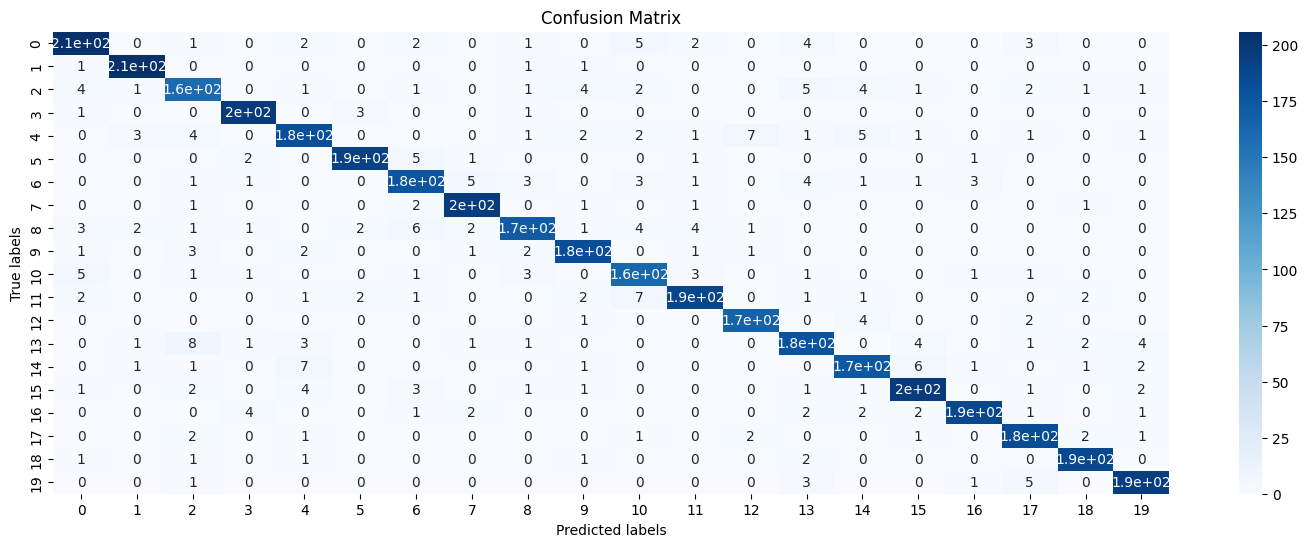

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(18, 6))

sns.heatmap(cm, annot=True, cmap="Blues")

plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")

plt.show()

# K Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
clf.fit(X_train, y_train)

# Evaluation
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       226
           1       0.92      1.00      0.96       209
           2       0.99      0.97      0.98       188
           3       1.00      0.98      0.99       202
           4       1.00      0.98      0.99       211
           5       0.99      0.98      0.99       203
           6       1.00      0.93      0.96       200
           7       0.91      1.00      0.95       202
           8       1.00      0.98      0.99       199
           9       0.99      0.95      0.97       194
          10       0.99      0.99      0.99       179
          11       0.96      0.97      0.97       208
          12       0.98      1.00      0.99       173
          13       1.00      0.97      0.99       204
          14       1.00      0.99      1.00       194
          15       1.00      0.96      0.98       214
          16       1.00      0.99      1.00       203
          17       1.00    

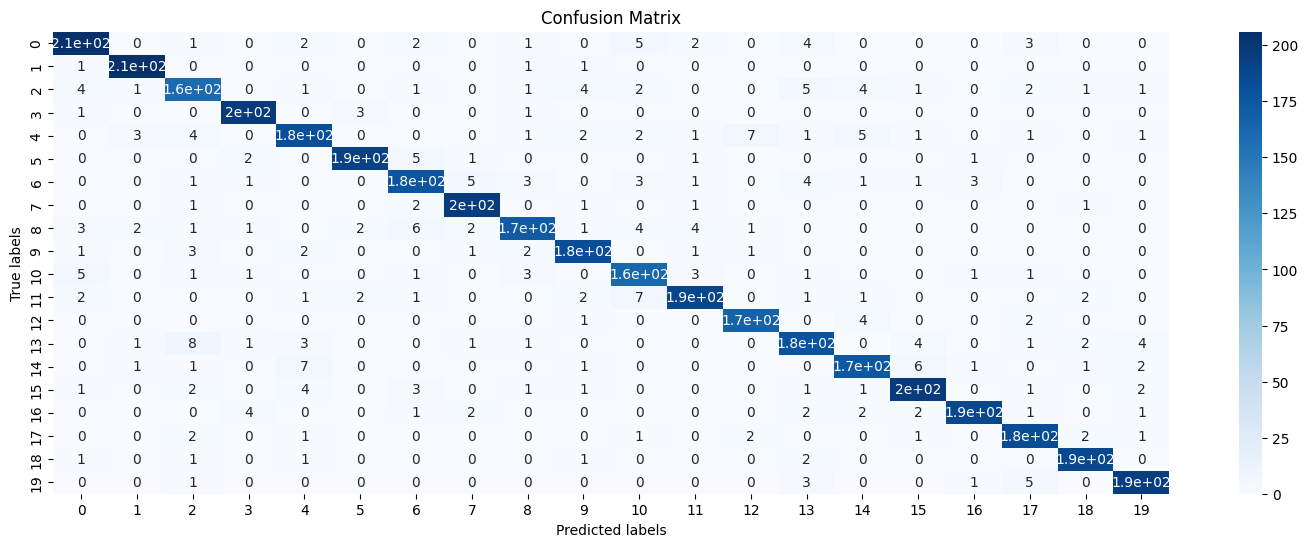

In [ ]:
# confusion_matrix
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(18, 6))

sns.heatmap(cm, annot=True, cmap="Blues")

plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")

plt.show()

# Naive Bayes model

In [ ]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

# Train the classifier
clf.fit(X_train, y_train)

# Evaluation
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.73      0.85       226
           1       1.00      0.65      0.79       209
           2       0.59      0.73      0.65       188
           3       0.99      0.75      0.86       202
           4       0.95      0.78      0.86       211
           5       0.88      0.80      0.84       203
           6       0.88      0.61      0.72       200
           7       1.00      0.82      0.90       202
           8       0.91      0.79      0.84       199
           9       0.73      0.77      0.75       194
          10       1.00      0.69      0.82       179
          11       0.84      0.69      0.76       208
          12       1.00      0.87      0.93       173
          13       0.75      0.67      0.71       204
          14       1.00      0.78      0.88       194
          15       0.46      0.55      0.50       214
          16       0.25      0.95      0.40       203
          17       1.00    

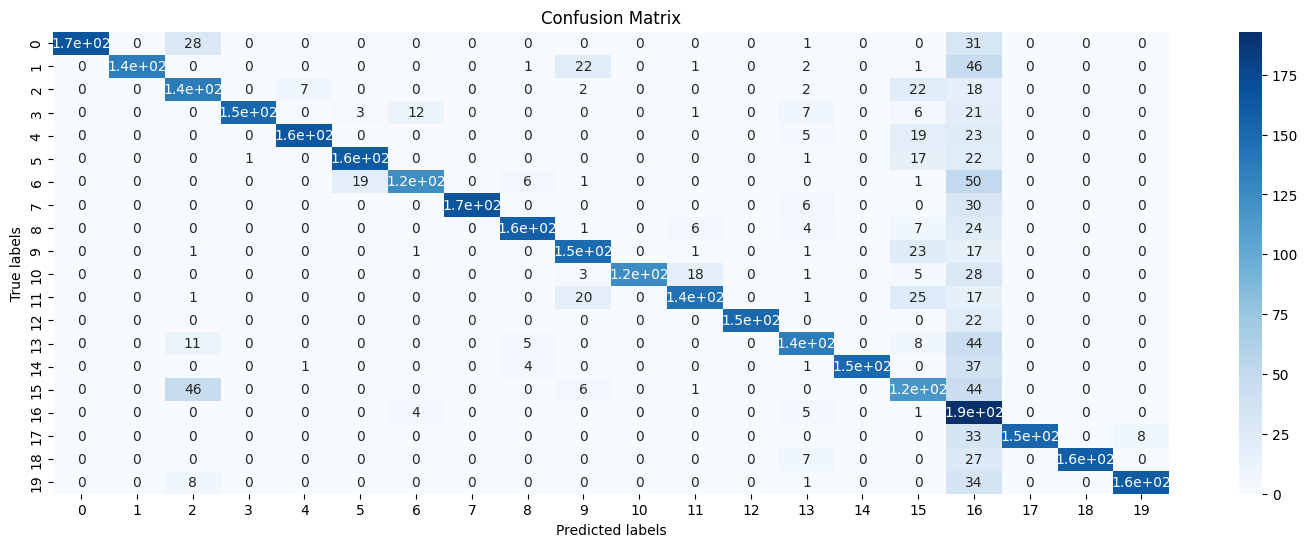

In [ ]:
# confusion_matrix
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(18, 6))

sns.heatmap(cm, annot=True, cmap="Blues")

plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")

plt.show()

# ANN (Artificial neural network)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0], df.iloc[:,2], test_size=0.3, random_state=42)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import pandas as pd
import numpy as np
import torch.utils.data as data_utils

# Dataset class to extract images and their labels
class LogoDataset(Dataset):
    def __init__(self, data, target, transform=None):
        self.labels_df = data
        self.target = target
        self.transform = transform
        self.len = data.shape[0]

    def __len__(self):
        return self.len

    def __getitem__(self, idx):
        img_path = self.labels_df.iloc[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.target.iloc[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

# MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)      # Input layer
        self.relu = nn.ReLU()                              # Activation function
        self.fc2 = nn.Linear(hidden_size, num_classes)     # Output Layer

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# transformations for preprocessing the images
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Defining the dataset and loading the data using data loader
dataset = LogoDataset(X_train, y_train, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

model = MLP(input_size=64*64*3, hidden_size=128, num_classes=20)

# loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the MLP model
num_epochs = 6
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(dataloader):
        # Flatten the images to input into MLP model
        images = images.view(images.size(0), -1)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print ('Epoch [{}/{}], Loss: {:.4f}' .format(epoch+1, num_epochs, loss.item()))


Epoch [1/6], Loss: 0.0470
Epoch [2/6], Loss: 0.0007
Epoch [3/6], Loss: 0.0042
Epoch [4/6], Loss: 0.0031
Epoch [5/6], Loss: 0.0296
Epoch [6/6], Loss: 0.0000


In [ ]:
# Testing the MLP model
testset = LogoDataset(X_test,y_test, transform=transform)
testloader = DataLoader(testset, batch_size=32, shuffle=False)
y_pred=[]

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testloader:
        # Flatten the images to input into MLP model
        images = images.view(images.size(0), -1)

        # Forward pass and accuracy over the testing dataset
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)           # Prediction on the testing dataset
        total += labels.size(0)
        correct += (predicted == labels).sum().item()       # Checking for correct outputs
        y_pred.append(predicted.numpy().tolist())           # Converting the tensors to list

    print('Accuracy of the MLP model on the test images: {} %'.format(100 * correct / total))    # Printing the accuracy


Accuracy of the MLP model on the test images: 98.93333333333334 %


In [ ]:
import itertools

# Flattening the y_pred list
y_pred = list(itertools.chain(*y_pred))
y_test=np.array(y_test)

# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       320
           1       0.99      0.99      0.99       327
           2       0.99      0.98      0.99       291
           3       1.00      1.00      1.00       312
           4       1.00      1.00      1.00       298
           5       0.99      1.00      1.00       304
           6       1.00      0.97      0.98       291
           7       0.99      1.00      1.00       289
           8       1.00      1.00      1.00       294
           9       1.00      0.98      0.99       309
          10       0.97      0.98      0.98       290
          11       0.98      0.99      0.99       318
          12       0.99      0.99      0.99       275
          13       0.99      1.00      1.00       310
          14       1.00      1.00      1.00       287
          15       1.00      0.99      0.99       296
          16       0.98      0.99      0.98       297
          17       0.95    

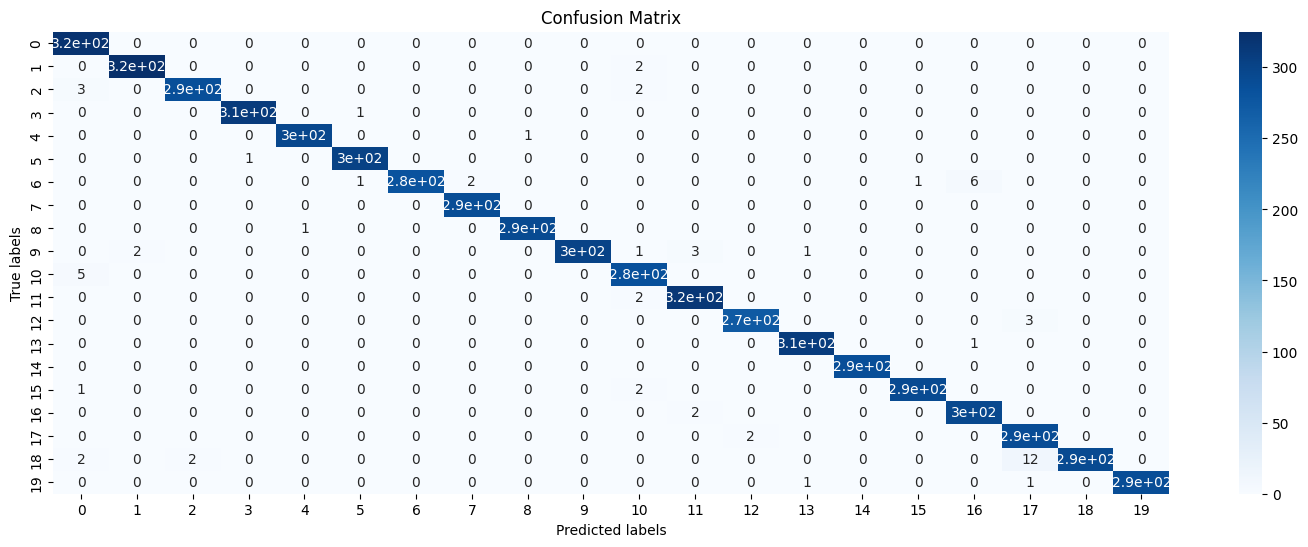

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(18, 6))

sns.heatmap(cm, annot=True, cmap="Blues")

plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")

plt.show()

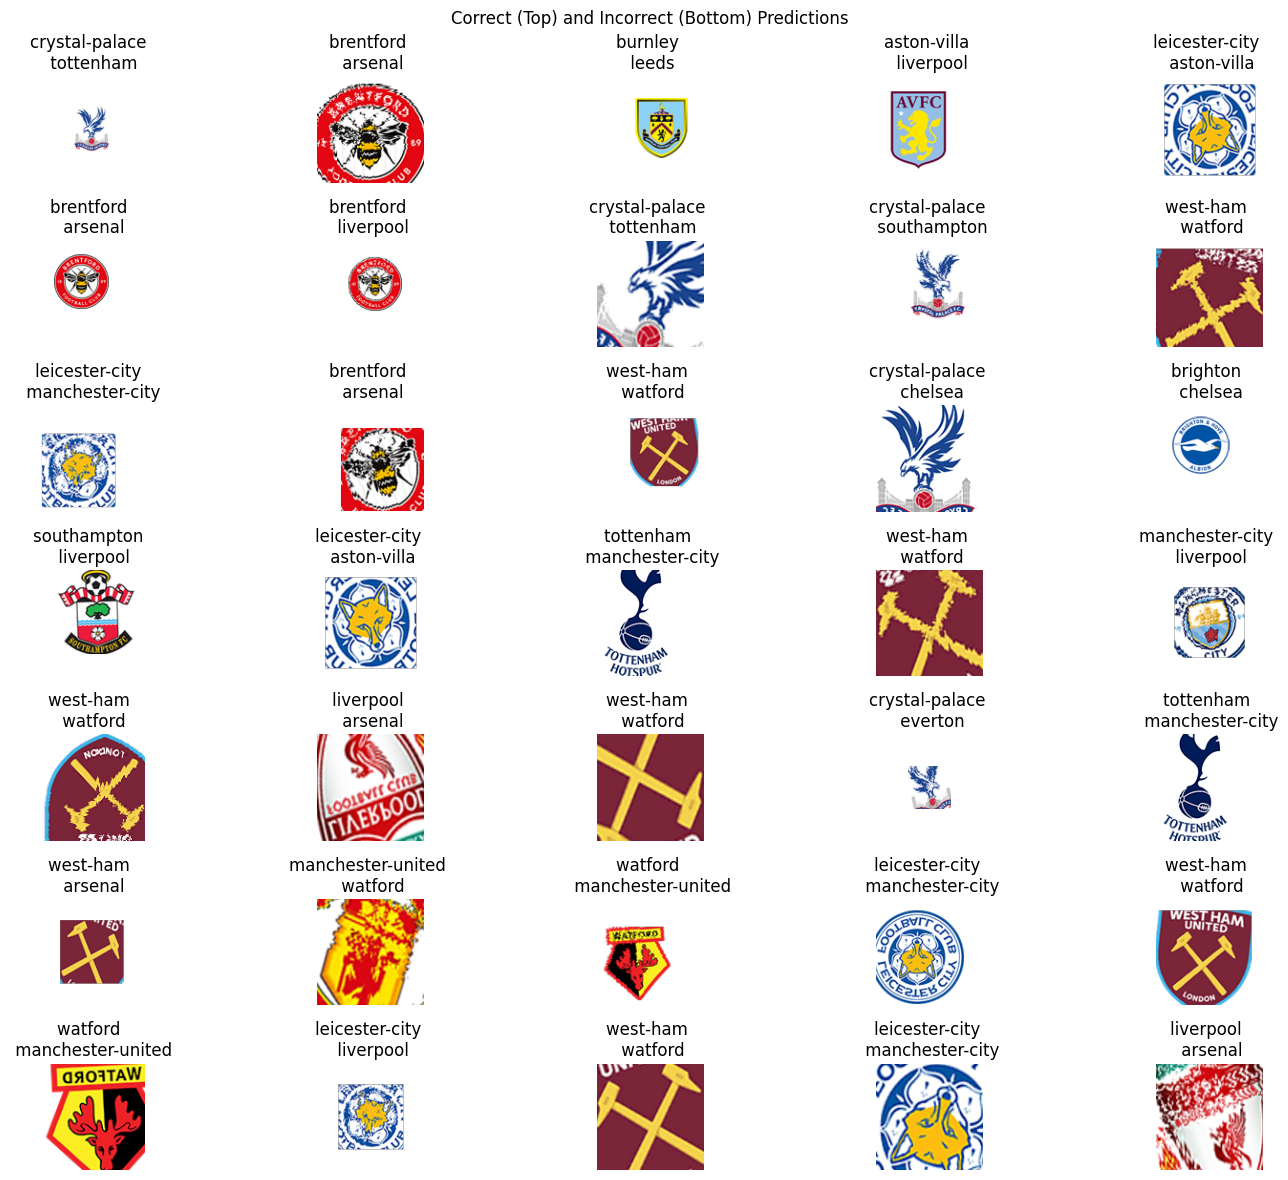

In [ ]:
# Plotting the false predicted images
fig, axs = plt.subplots(nrows=7, ncols=5, figsize=(15, 12))
a=0
k=0
j=0
for i in range(len(y_test)):

  if(y_pred[i]!=y_test[i]):      # Checking if the prediction is wrong
    a+=1
    path = X_test.iloc[i]        # Extracting the path
    img = Image.open(path)       # Extracting the image
    axs[k][j].imshow(img)        # Plotting the image
    axs[k][j].axis('off')
    truename = df[df['team'] == y_test[i]]['team_name'].iloc[0]
    name = df[df['team'] == y_pred[i]]['team_name'].iloc[0]
    axs[k][j].set_title(truename + " \n " + name)
    j=j+1
    if (j==5):
      k=k+1
      j=0
  if(a==35):
    break

fig.suptitle('Correct (Top) and Incorrect (Bottom) Predictions')
plt.tight_layout()
plt.show()

# CNN (Convolutional neural network)

In [ ]:
import cv2
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical

# Load the images
X = []
for filepath in df['filepath']:
    img = cv2.imread(filepath)
    img = cv2.resize(img, (100, 100)) # resize the image to 100x100
    X.append(img)
X = np.array(X)

# target variable
y = np.array(df['team'])
y = to_categorical(y) # convert the labels to one-hot encoded format

# train and test sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

model = Sequential()

# Adding layers to the model
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(20, activation='softmax'))

# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))

# Evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)


Epoch 1/10
469/469 [==============================] - 173s 368ms/step - loss: 48.5450 - accuracy: 0.8886 - val_loss: 0.1626 - val_accuracy: 0.9788
Epoch 2/10
469/469 [==============================] - 177s 378ms/step - loss: 0.0441 - accuracy: 0.9915 - val_loss: 0.1118 - val_accuracy: 0.9870
Epoch 3/10
469/469 [==============================] - 178s 379ms/step - loss: 0.0341 - accuracy: 0.9934 - val_loss: 0.1761 - val_accuracy: 0.9834
Epoch 4/10
469/469 [==============================] - 177s 377ms/step - loss: 0.0782 - accuracy: 0.9906 - val_loss: 0.1512 - val_accuracy: 0.9832
Epoch 5/10
469/469 [==============================] - 219s 468ms/step - loss: 0.2125 - accuracy: 0.9817 - val_loss: 0.2489 - val_accuracy: 0.9836
Epoch 6/10
469/469 [==============================] - 211s 450ms/step - loss: 0.0901 - accuracy: 0.9926 - val_loss: 0.4081 - val_accuracy: 0.9798
Epoch 7/10
469/469 [==============================] - 211s 449ms/step - loss: 0.0786 - accuracy: 0.9934 - val_loss: 0.1689 

In [ ]:
images=[]
teamname=[]

# Predicting the labels of the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)



125/125 [==============================] - 12s 98ms/step


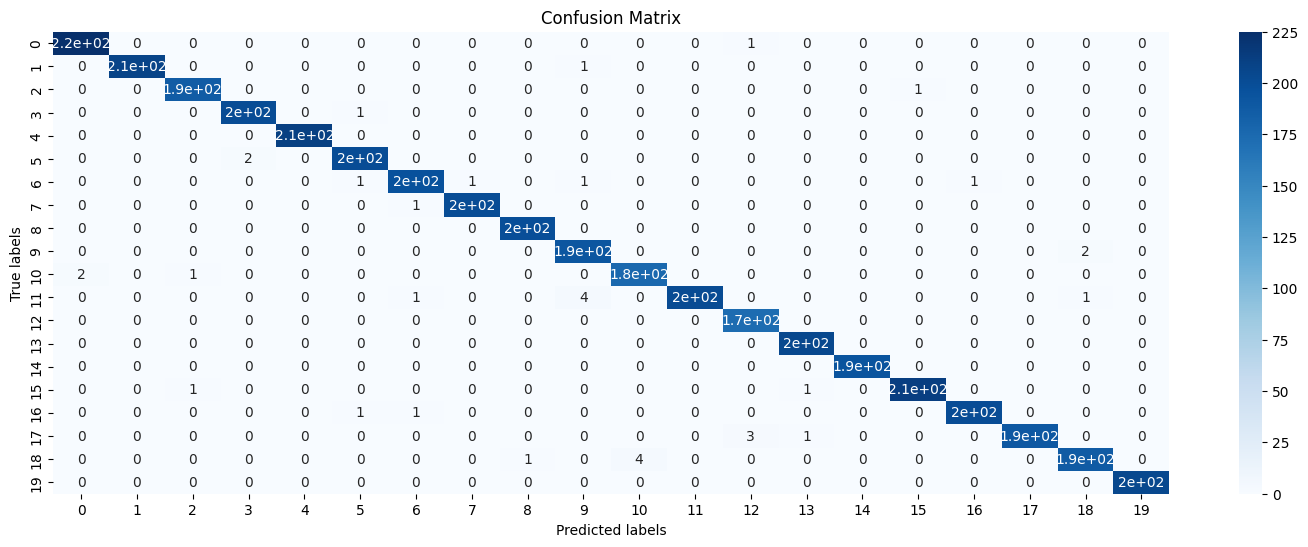

In [ ]:
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(18, 6))

sns.heatmap(cm, annot=True, cmap="Blues")

plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")

plt.show()

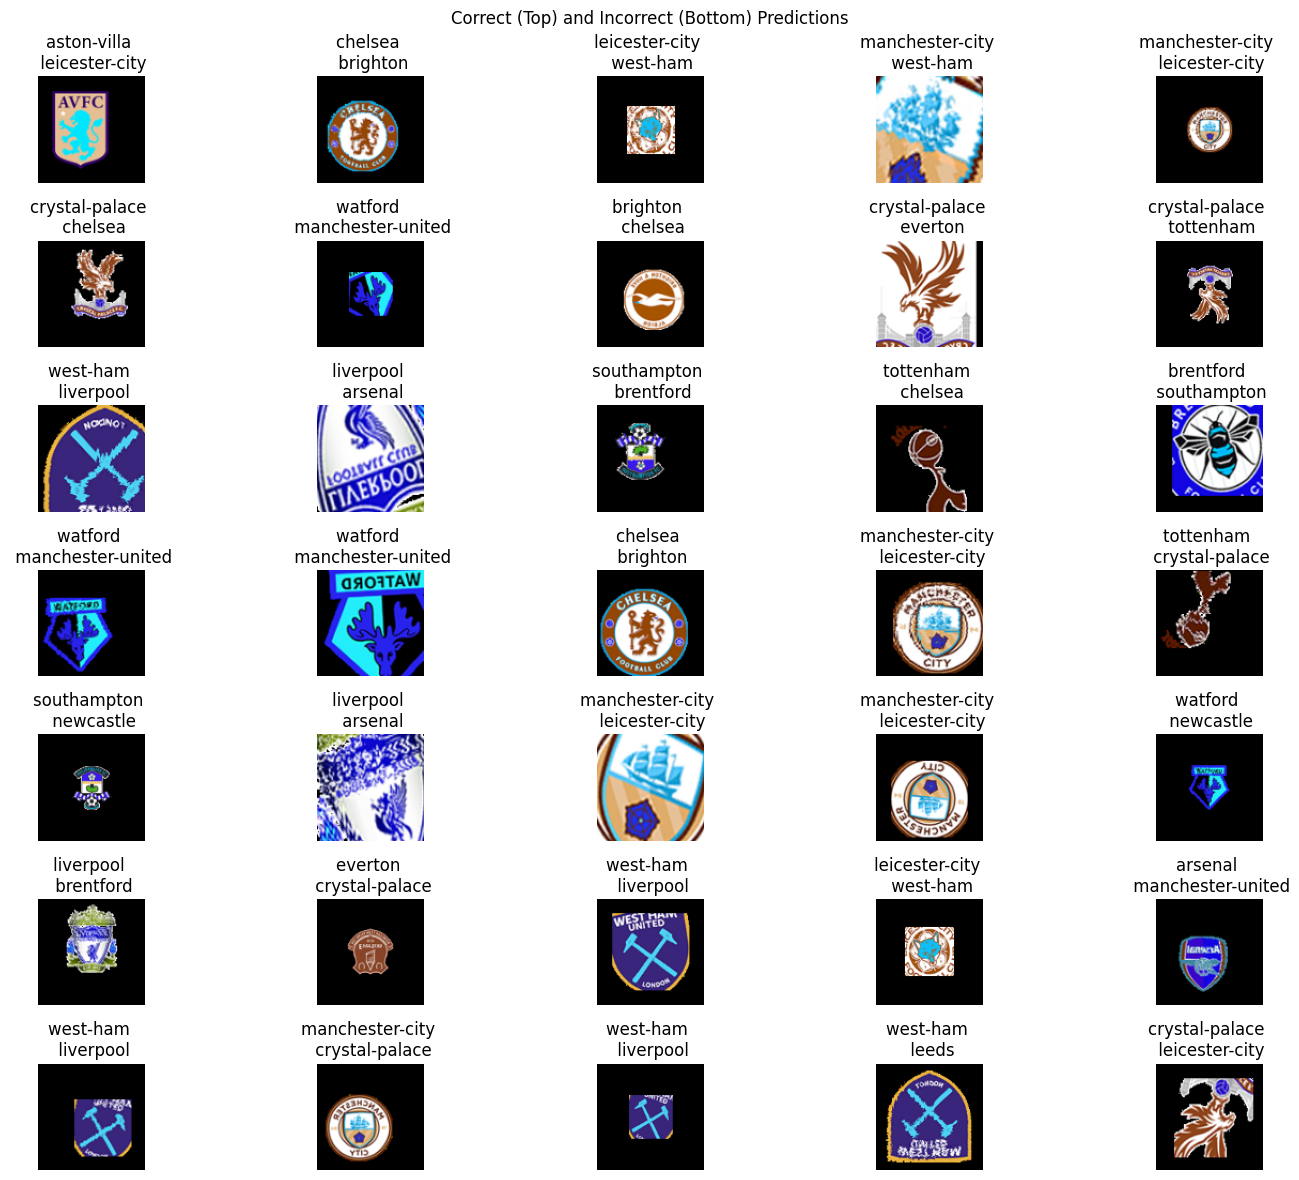

In [ ]:
# Plot RGB images
fig, axs = plt.subplots(nrows=7, ncols=5, figsize=(15, 12))
a=0
k=0
j=0
for i in range(len(y_test)):

  if(y_pred[i]!=y_test[i]):
    img = X_test[i]
    axs[k][j].imshow(img)
    axs[k][j].axis('off')
    truename = df[df['team'] == y_test[i]]['team_name'].iloc[0]
    name = df[df['team'] == y_pred[i]]['team_name'].iloc[0]
    axs[k][j].set_title(truename + " \n " + name)
    j=j+1
    if (j==5):
      k=k+1
      j=0

fig.suptitle('Correct (Top) and Incorrect (Bottom) Predictions')
plt.tight_layout()
plt.show()


